In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import numpy as np
import bokeh 
from bokeh.plotting import figure, output_file, show
from bokeh.charts import Bar, output_notebook, show

In [2]:
output_notebook()
arq = open("sales.csv", "r")
df = pd.read_csv(arq)

Loading BokehJS ...

In [3]:
df.shape

(351091, 4)

In [4]:
df.head(5)

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE
0,P6,2015-08-02,1.0,1808.99
1,P6,2015-08-17,1.0,1674.00
2,P6,2015-08-17,1.0,1673.95
3,P6,2015-08-11,1.0,1674.00
4,P6,2015-08-17,1.0,1674.00


In [5]:
df.apply(lambda x: sum(x.isnull()),axis=0)

PROD_ID       0
DATE_ORDER    0
QTY_ORDER     0
REVENUE       0
dtype: int64

In [6]:
produto_map={'P1':1, 'P2':2, 'P3':3, 'P4':4, 'P5':5, 'P6':6, 'P7':7, 'P8':8,'P9':9}

In [7]:
df['PROD_ID'] = df['PROD_ID'].map(produto_map)

In [8]:
df.head(5)

,PROD_ID,DATE_ORDER,QTY_ORDER,REVENUE
0,6,2015-08-02,1.0,1808.99
1,6,2015-08-17,1.0,1674.00
2,6,2015-08-17,1.0,1673.95
3,6,2015-08-11,1.0,1674.00
4,6,2015-08-17,1.0,1674.00


In [9]:
num_C1 = len(df.loc[df['PROD_ID'] == 1])
num_C2 = len(df.loc[df['PROD_ID'] == 2])
num_C3 = len(df.loc[df['PROD_ID'] == 3])
num_C4 = len(df.loc[df['PROD_ID'] == 4])
num_C5 = len(df.loc[df['PROD_ID'] == 5])
num_C6 = len(df.loc[df['PROD_ID'] == 6])
num_C7 = len(df.loc[df['PROD_ID'] == 7])
num_C8 = len(df.loc[df['PROD_ID'] == 8])
num_C9 = len(df.loc[df['PROD_ID'] == 9])
print("Quantidade do P1: {0} ({1:2.2f}%)".format(num_C1,(num_C1/(num_C1+num_C2+num_C3+num_C4+num_C5+num_C6+num_C7+num_C8+num_C9))*100))
print("Quantidade do P2: {0} ({1:2.2f}%)".format(num_C2,(num_C2/(num_C1+num_C2+num_C3+num_C4+num_C5+num_C6+num_C7+num_C8+num_C9))*100))
print("Quantidade do P3: {0} ({1:2.2f}%)".format(num_C3,(num_C3/(num_C1+num_C2+num_C3+num_C4+num_C5+num_C6+num_C7+num_C8+num_C9))*100))
print("Quantidade do P4: {0} ({1:2.2f}%)".format(num_C4,(num_C4/(num_C1+num_C2+num_C3+num_C4+num_C5+num_C6+num_C7+num_C8+num_C9))*100))
print("Quantidade do P5: {0} ({1:2.2f}%)".format(num_C5,(num_C5/(num_C1+num_C2+num_C3+num_C4+num_C5+num_C6+num_C7+num_C8+num_C9))*100))
print("Quantidade do P6: {0} ({1:2.2f}%)".format(num_C6,(num_C6/(num_C1+num_C2+num_C3+num_C4+num_C5+num_C6+num_C7+num_C8+num_C9))*100))
print("Quantidade do P7: {0} ({1:2.2f}%)".format(num_C7,(num_C7/(num_C1+num_C2+num_C3+num_C4+num_C5+num_C6+num_C7+num_C8+num_C9))*100))
print("Quantidade do P8: {0} ({1:2.2f}%)".format(num_C8,(num_C8/(num_C1+num_C2+num_C3+num_C4+num_C5+num_C6+num_C7+num_C8+num_C9))*100))
print("Quantidade do P9: {0} ({1:2.2f}%)".format(num_C9,(num_C9/(num_C1+num_C2+num_C3+num_C4+num_C5+num_C6+num_C7+num_C8+num_C9))*100))

Quantidade do P1: 4091 (1.17%)
Quantidade do P2: 63358 (18.05%)
Quantidade do P3: 2899 (0.83%)
Quantidade do P4: 14656 (4.17%)
Quantidade do P5: 19775 (5.63%)
Quantidade do P6: 4102 (1.17%)
Quantidade do P7: 195939 (55.81%)
Quantidade do P8: 27840 (7.93%)
Quantidade do P9: 18431 (5.25%)


In [10]:
y=df['PROD_ID'] 

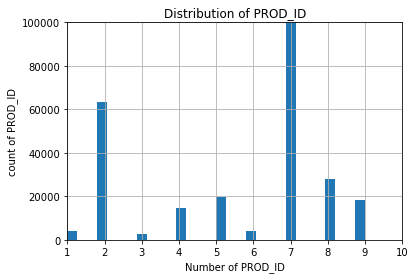

In [17]:
y.hist(bins=30)
plt.axis((1,10,0,100000))
plt.title("Distribution of PROD_ID")
plt.ylabel('count of PROD_ID')
plt.xlabel('Number of PROD_ID');

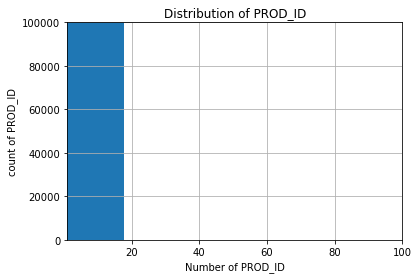

In [22]:
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

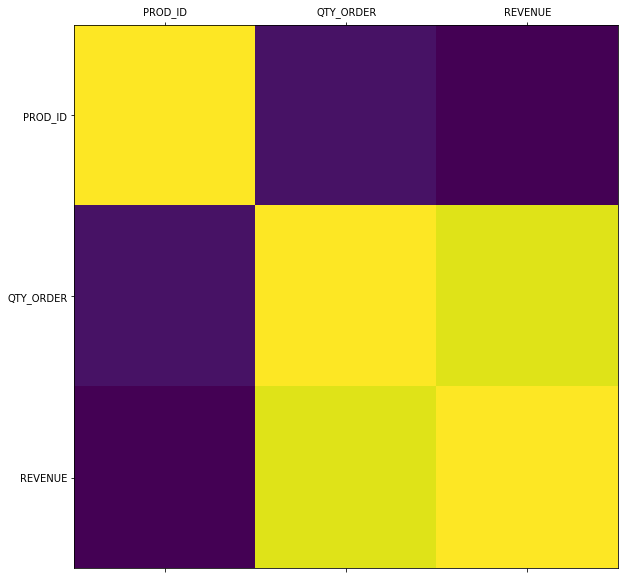

In [23]:
plot_corr(df)

In [24]:
df.corr()

,PROD_ID,QTY_ORDER,REVENUE
PROD_ID,1.000000,0.000347,-0.049231
QTY_ORDER,0.000347,1.000000,0.948663
REVENUE,-0.049231,0.948663,1.000000


In [25]:
#media de vendas
p=df['REVENUE']
media_price= lambda p: (p.mean())

In [26]:
print(media_price(p))

764.9536154729539


In [27]:
print(df['REVENUE'].describe())

count    351091.000000
mean        764.953615
std         781.957331
min         229.000000
25%         649.000000
50%         749.000000
75%         799.000000
max      368750.000000
Name: REVENUE, dtype: float64


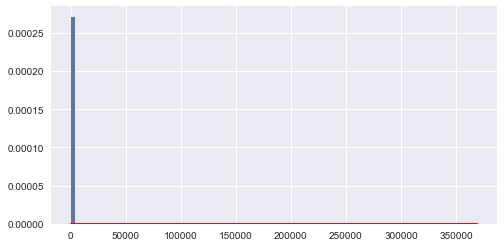

In [34]:
#distribuíção normal
import seaborn as sns # importando seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

mu, sigma =0, 0.1
s = df['REVENUE']

conta, box, ignorar = plt.hist(s, 100, normed=True)
normal = plt.plot(box, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (box - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

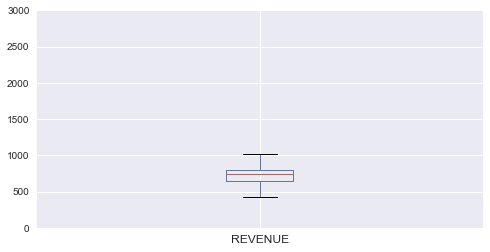

In [33]:
plt.axis((0,10,0,3000))
df.boxplot(column='REVENUE')

In [36]:
#tratando os valores extremos da amostra
df['REVENUE_LOG'] = np.log(df['REVENUE'])

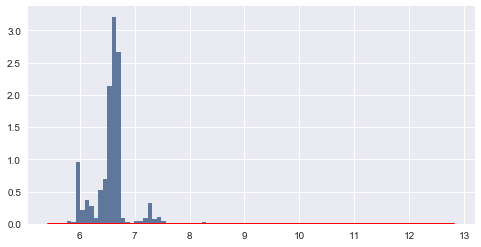

In [37]:
#distribuíção normal
import seaborn as sns # importando seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

mu, sigma = 0, 0.1 
s = df['REVENUE_LOG']

conta, box, ignorar = plt.hist(s, 90, normed=True)
normal = plt.plot(box, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (box - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

In [38]:
#regressão linear
x = df['REVENUE']
y = df['QTY_ORDER']
from scipy.stats import linregress

linregress(x,y)

LinregressResult(slope=0.001338937505053093, intercept=0.054612025224008542, rvalue=0.94866302885438936, pvalue=0.0, stderr=7.5339583244605706e-07)

In [39]:
#regressão linear
x = df['REVENUE']
y = df['PROD_ID']
from scipy.stats import linregress

linregress(x,y)

LinregressResult(slope=-0.00013820920865118829, intercept=6.0352034553201639, rvalue=-0.049231006311525903, pvalue=2.7211502846337352e-187, stderr=4.7321959441768434e-06)

In [42]:
df7= df['DATE_ORDER']
s=df7
def conta_ocorrencias(s):
    ocorrencias = {}
    for c in s:
        if c in ocorrencias:
            ocorrencias[c] = ocorrencias[c] + 1
        else:
            ocorrencias[c] = 1
    return ocorrencias
print(conta_ocorrencias(s))

{'2015-08-02': 188, '2015-08-17': 502, '2015-08-11': 675, '2015-07-30': 1810, '2015-08-06': 803, '2015-08-16': 259, '2015-07-25': 646, '2015-07-16': 1621, '2015-07-31': 1473, '2015-07-21': 1088, '2015-08-10': 807, '2015-08-23': 275, '2015-07-27': 1074, '2015-08-07': 681, '2015-07-28': 1194, '2015-07-26': 501, '2015-08-19': 12308, '2015-07-29': 979, '2015-09-24': 4142, '2015-09-01': 6669, '2015-08-31': 2410, '2015-08-26': 570, '2015-08-20': 7737, '2015-08-13': 320, '2015-08-27': 392, '2015-08-04': 694, '2015-09-23': 5282, '2015-08-24': 853, '2015-08-28': 292, '2015-10-01': 3395, '2015-09-30': 2794, '2015-10-06': 536, '2015-10-07': 1099, '2015-10-08': 1685, '2015-09-25': 493, '2015-09-22': 1975, '2015-10-03': 994, '2015-10-02': 2882, '2015-10-05': 1102, '2015-09-27': 543, '2015-10-12': 634, '2015-07-20': 1498, '2015-08-05': 491, '2015-08-01': 419, '2015-10-04': 655, '2015-09-02': 7255, '2015-09-11': 1683, '2015-09-13': 447, '2015-09-10': 1921, '2015-09-14': 1149, '2015-09-29': 2166, '201

In [43]:
m=s
moda=lambda m: (m.mode())

In [44]:
print(moda(m))

0    2015-08-19
dtype: object


In [45]:
dados_compP = df['REVENUE']

In [46]:
moavg = pd.rolling_mean(dados_compP, 40)
print(moavg)

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
5                NaN
6                NaN
7                NaN
8                NaN
9                NaN
10               NaN
11               NaN
12               NaN
13               NaN
14               NaN
15               NaN
16               NaN
17               NaN
18               NaN
19               NaN
20               NaN
21               NaN
22               NaN
23               NaN
24               NaN
25               NaN
26               NaN
27               NaN
28               NaN
29               NaN
             ...    
351061    1169.71650
351062    1173.06125
351063    1176.40600
351064    1178.13000
351065    1179.85400
351066    1183.90125
351067    1184.16650
351068    1187.51125
351069    1192.47675
351070    1194.17575
351071    1195.87725
351072    1192.57625
351073    1192.14600
351074    1193.87000
351075    1193.87000
351076    1195.49075
351077    119

C:\Users\Paulinha\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=40,center=False).mean()
  if __name__ == '__main__':


In [47]:
df.apply(lambda x: sum(moavg.isnull()),axis=0)

PROD_ID        39
DATE_ORDER     39
QTY_ORDER      39
REVENUE        39
REVENUE_LOG    39
dtype: int64

In [48]:
rets = dados_compP / dados_compP.shift(1) - 1
rets.head()

0         NaN
1   -0.074622
2   -0.000030
3    0.000030
4    0.000000
Name: REVENUE, dtype: float64

In [49]:
dados_compP.pct_change().head()

0         NaN
1   -0.074622
2   -0.000030
3    0.000030
4    0.000000
Name: REVENUE, dtype: float64

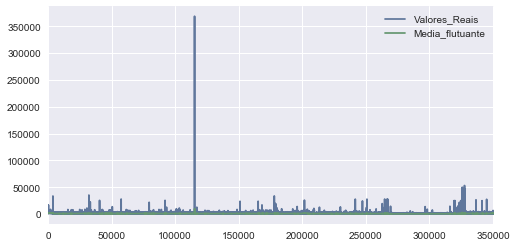

In [50]:
dados_compP.plot(label='Valores_Reais')
moavg.plot(label='Media_flutuante')
plt.legend()

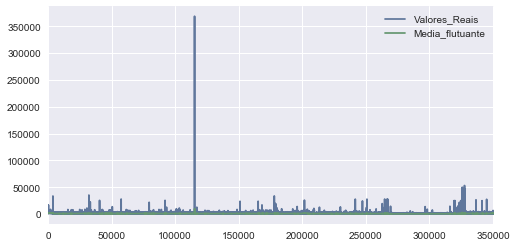

In [51]:
dados_compP.plot(label='Valores_Reais')
moavg.plot(label='Media_flutuante')
plt.legend()

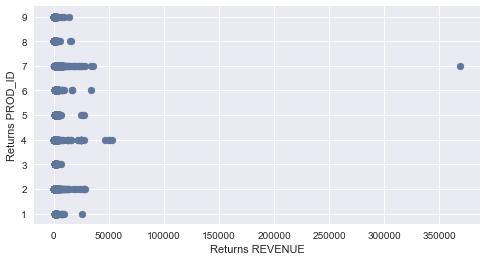

In [52]:
x=df['REVENUE']
y=df['PROD_ID']
plt.scatter(x,y )
plt.xlabel('Returns REVENUE')
plt.ylabel('Returns PROD_ID')

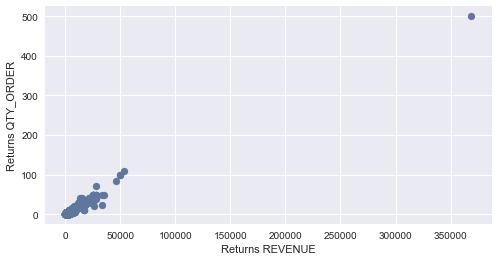

In [53]:
x=df['REVENUE']
y=df['QTY_ORDER']
plt.scatter(x,y )
plt.xlabel('Returns REVENUE')
plt.ylabel('Returns QTY_ORDER')

In [ ]:
plt.scatter(df.mean(), df.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(df.columns, df.mean(), df.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))